In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [22]:
# Load the data
data = pd.read_csv('/Users/olakunlealabi/Downloads/supermarket_marketing/Supermarket_CustomerMembers.csv')

In [14]:
# Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
high_value                0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

       high_value  
count  200.000000  
mean     0.510000  
std      0.501154  
min      0.000000  
25%      0.000000  
50%  

In [23]:
# Create the high_value feature
data['high_value'] = np.where(data['Spending Score (1-100)'] >= 50, 1, 0)

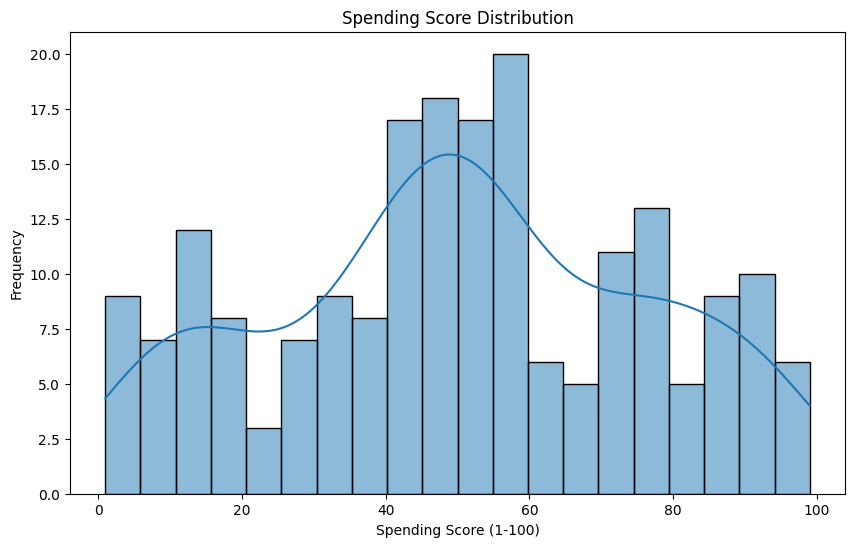

In [16]:
# Spending Score distribution
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

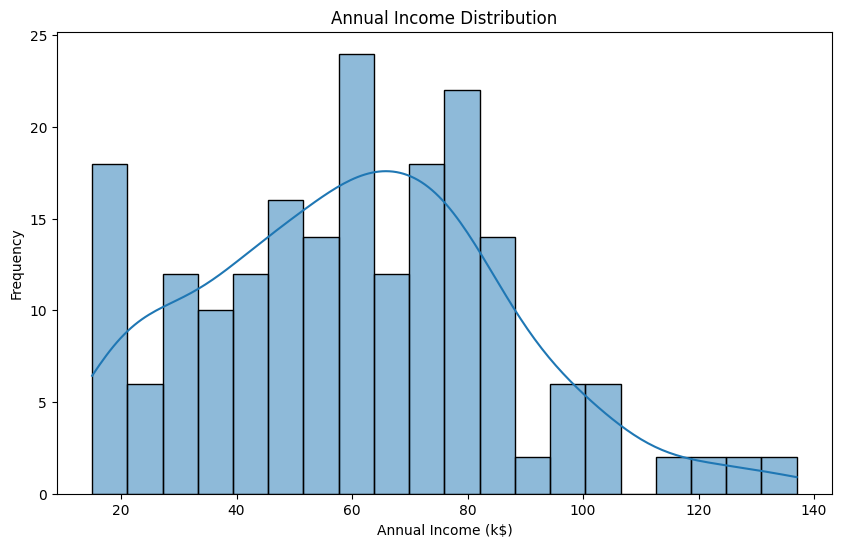

In [17]:
# Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

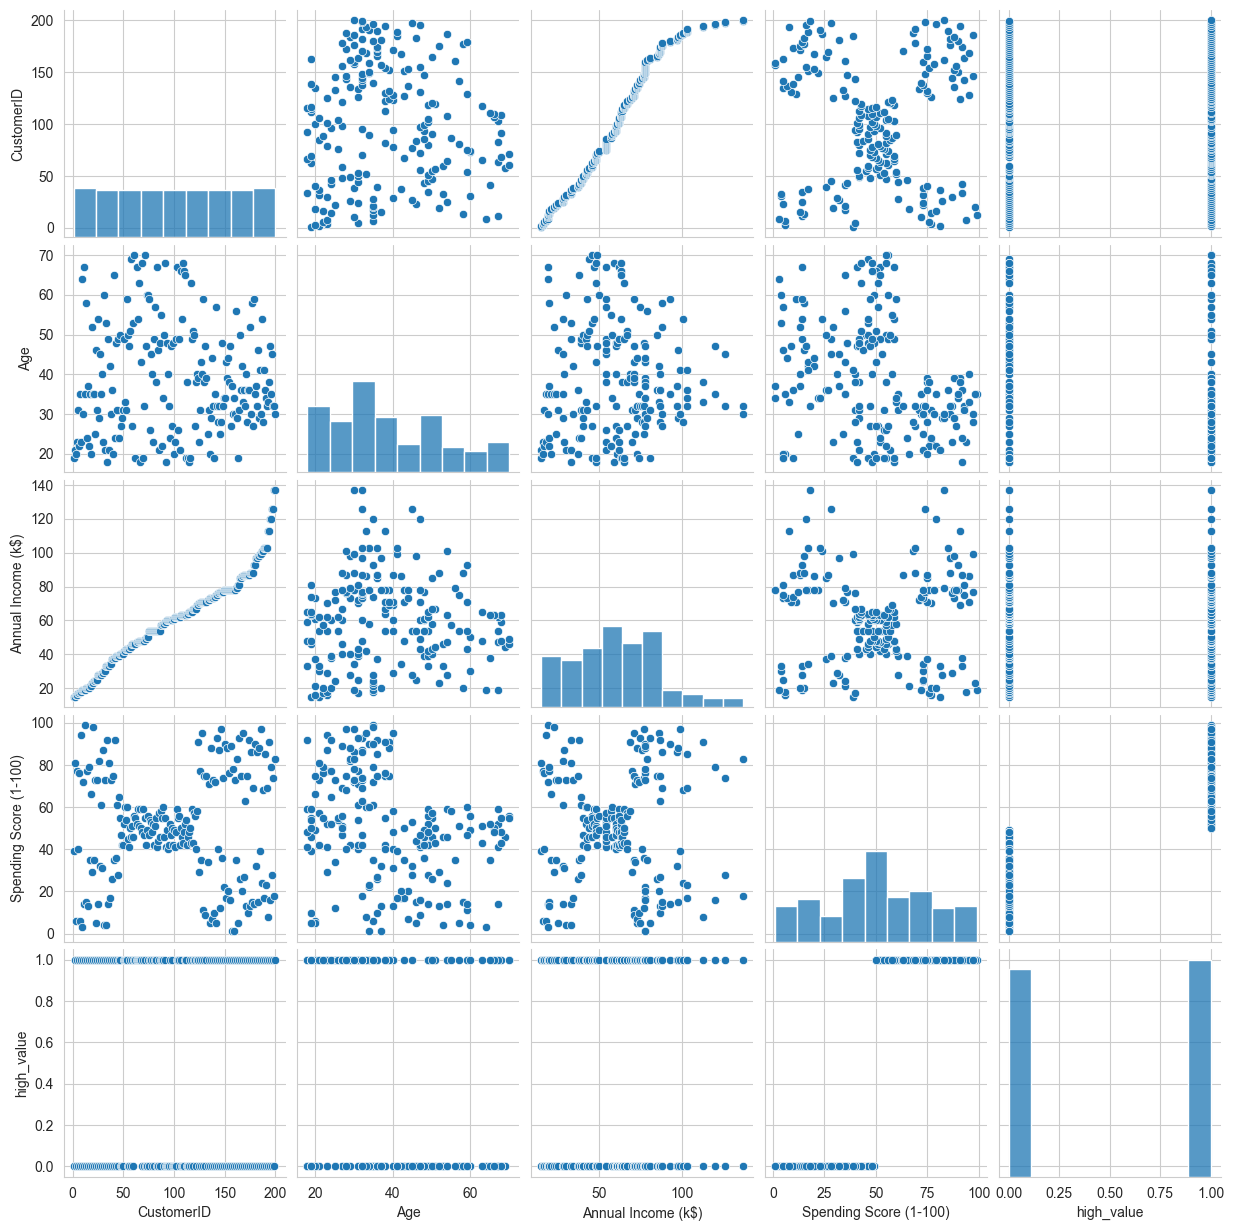

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Pairplot to visualize relationships
sns.set_style("whitegrid")

sns.pairplot(data)
plt.show()

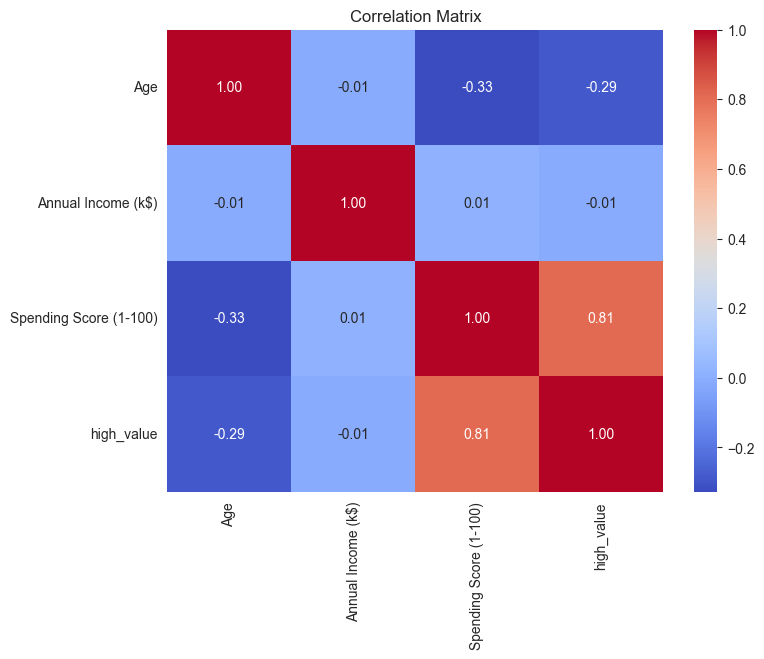

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','high_value']].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Features and target variable
X = data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['high_value']

In [6]:
# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Genre']),
        ('num', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
    ]
)

In [24]:
# Create the X#
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Genre']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score '
                                                   '(1-100)'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [9]:
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-Squared: 0.9999799777530589
Mean Absolute Error: 0.0005000000000000004
Mean Squared Error: 5.00000000000001e-06


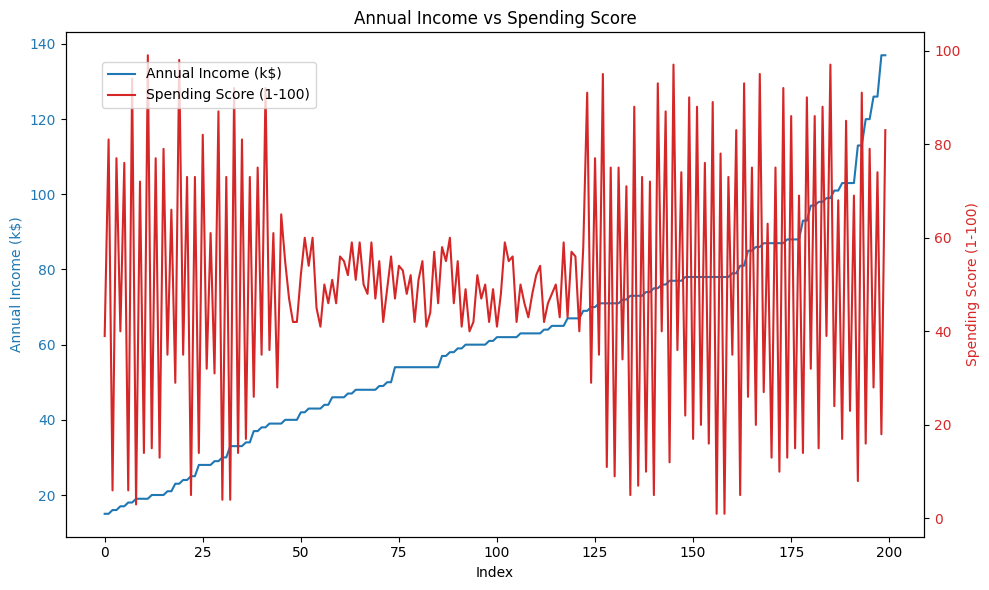

In [11]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Annual Income
color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('Annual Income (k$)', color=color)
ax1.plot(data.index, data['Annual Income (k$)'], color=color, label='Annual Income (k$)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Spending Score
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Spending Score (1-100)', color=color)
ax2.plot(data.index, data['Spending Score (1-100)'], color=color, label='Spending Score (1-100)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Annual Income vs Spending Score')
fig.tight_layout()  # Adjust layout to prevent overlap
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validated R-Squared Scores: {cv_scores}")
print(f"Mean Cross-Validated R-Squared: {np.mean(cv_scores)}")


Cross-Validated R-Squared Scores: [1.         0.99898721 0.99655556 1.         1.        ]
Mean Cross-Validated R-Squared: 0.999108553566354
